             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
(28, 9)
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object
Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64
               Регіон  2019
2           Волинська  10.1
6        Закарпатська  10.4
8   Івано-Франківська   8.8
12          Львівська   8.7
14            Одеська   8.8
16         Рівненська  10.7
20         Херсонська   8.1
23        Чернівецька   9.2
25               Київ  11.0
       

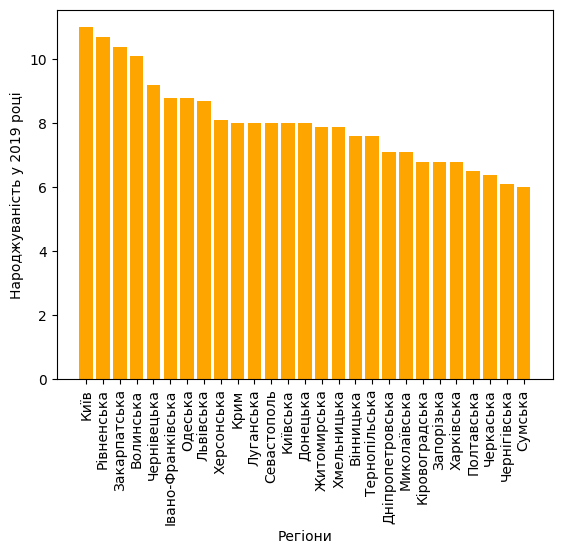

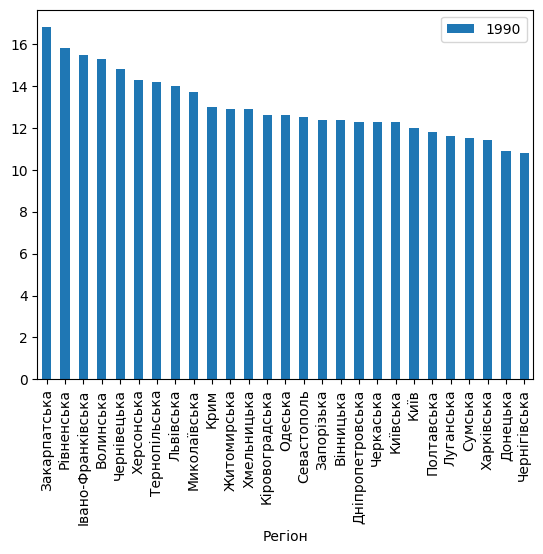

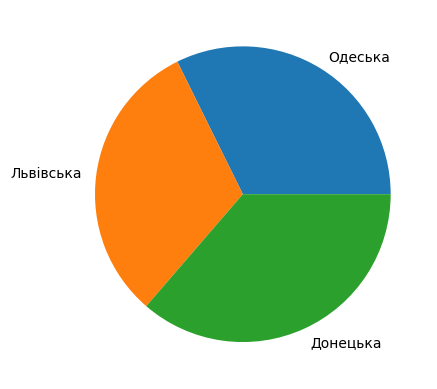

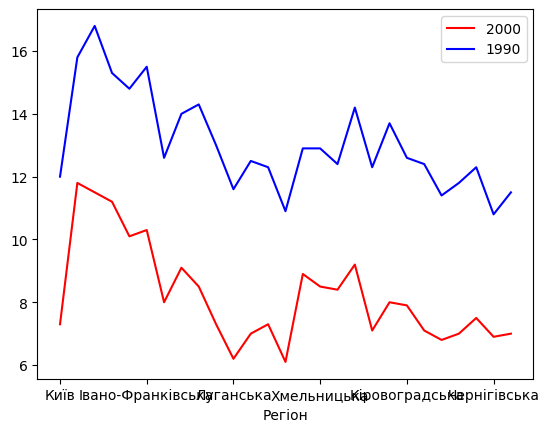

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"
#Замініть у таблиці значення "—" на значення NaN
data = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C",\
                     attrs={"class":"wikitable collapsible collapsed", "style":"text-align: right"}, na_values=['—'], decimal=',', thousands='')
df = data[2]

#Вивести перші рядки таблиці за допомогою методу head
print(df.head())

#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
print(df.shape)

#Визначте типи всіх стовпців за допомогою dataframe.dtypes
print(df.dtypes)

#Порахуйте, яка частка пропусків міститься в кожній колонці
print(df.isnull().sum())

#Видаліть з таблиці дані по всій країні, останній рядок таблиці
df.drop(df.tail(1).index, inplace=True)

#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
cols = ['1950','1960','1970','1990','2000','2012','2014','2019']
df = df.fillna(df[cols].mean()).round(1)

#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
birth_rate_2019 = df[df['2019']>df['2019'].mean()][['Регіон','2019']]
print(birth_rate_2019)

#У якому регіоні була найвища народжуваність у 2014 році?
birth_rate_max_2014 = df[df['2014']==df['2014'].max()][['Регіон','2014']]
print(birth_rate_max_2014)

#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
df = df.sort_values('2019', ascending=False)

plt.bar(
    df['Регіон'],
    df['2019'],
    color='orange'
)
plt.xlabel("Регіони")
plt.ylabel("Народжуваність у 2019 році")
plt.xticks(rotation='vertical')
plt.show()

df_chart1 = df.filter(items=['Регіон','1990']).sort_values(by='1990', ascending=False)
df_chart1.plot(kind='bar', x='Регіон', y='1990')
plt.show()

df_chart2 = df.filter(items=['Регіон','1950']).query('Регіон == "Львівська" or Регіон == "Одеська" or Регіон == "Донецька"')
plt.pie(df_chart2['1950'], labels=df_chart2['Регіон'])
plt.show()

ax = plt.gca()
df_chart3 = df.filter(items=['Регіон','1990','2000'])
df_chart3.plot(kind='line', x='Регіон', y='2000', color='red', ax=ax)
df_chart3.plot(kind='line', x='Регіон', y='1990', color='blue', ax=ax)
plt.show()